In [1]:
import sys
import re
import matplotlib.pyplot as plt
import numpy as np

# SQuAD Explanatory Data Analysis

Key Observations:
1. Less than 0.5% of the contexts have length >=400
2. Less than 0.1% of the questions have length >=30
3. Only about 1% of the answers have span >=20. Most answers are very very short (eg. length 1)
4. About 10% of the answers have no alphabetical characters (eg. dates, numbers)
5. Most questions start with 'what', 'who', 'how, 'when', 'which', 'where', 'why'

In [2]:
train_context = 'data/train.context'
train_question = 'data/train.question'
train_answer = 'data/train.answer'
train_span = 'data/train.span'

dev_context = 'data/dev.context'
dev_question = 'data/dev.question'
dev_answer = 'data/dev.answer'
dev_span = 'data/dev.span'

In [3]:
def length_statistics(data):
    MAX_LIMIT = 1000
    counter = [0] * MAX_LIMIT # count[i] is the number of lines with length i
    max_len = 0
    with open(data, 'r') as F:
        for line in F:
            length = len(line.strip().split(' '))
            max_len = max(length, max_len)
            assert (length < MAX_LIMIT)
            counter[length] += 1
    return counter[:max_len+1], max_len

def context_statistics(data):
    context_stats, context_max = length_statistics(data)
    num_examples = sum(context_stats)
    print "Number of examples: {}".format(num_examples)
    print "Max Length: {}".format(context_max)
    print "Mode Length: {}".format(np.argmax(np.array(context_stats)))
    print ">=600: {} ({}%)".format(sum(context_stats[600:]), 100.0*sum(context_stats[600:])/num_examples)
    print ">=500: {} ({}%)".format(sum(context_stats[500:]), 100.0*sum(context_stats[500:])/num_examples)
    print ">=400: {} ({}%)".format(sum(context_stats[400:]), 100.0*sum(context_stats[400:])/num_examples)
    print ">=300: {} ({}%)".format(sum(context_stats[300:]), 100.0*sum(context_stats[300:])/num_examples)
    plt.figure()
    plt.bar(range(len(context_stats)), context_stats)

def question_statistics(data):
    quest_stats, quest_max = length_statistics(data)
    num_examples = sum(quest_stats)
    print "Number of examples: {}".format(num_examples)
    print "Max Length: {}".format(quest_max)
    print "Mode Length: {}".format(np.argmax(np.array(quest_stats)))
    print ">=30: {} ({}%)".format(sum(quest_stats[30:]), 100.0*sum(quest_stats[30:])/num_examples)
    print ">=25: {} ({}%)".format(sum(quest_stats[25:]), 100.0*sum(quest_stats[25:])/num_examples)
    print ">=20: {} ({}%)".format(sum(quest_stats[20:]), 100.0*sum(quest_stats[20:])/num_examples)
    plt.figure()
    plt.bar(range(len(quest_stats)), quest_stats)
    
def span_statistics(data):
    MAX_LIMIT = 100
    counter = [0] * MAX_LIMIT
    max_span = 0
    with open(data, 'r') as F:
        for line in F:
            span = map(int, line.strip().split(' '))
            span = span[1] - span[0] + 1
            max_span = max(span, max_span)
            counter[span] += 1
    counter = counter[:max_span+1]
    num_examples = sum(counter)
    print "Number of examples: {}".format(num_examples)
    print "Max Span: {}".format(max_span)
    print "Mode Span: {}".format(np.argmax(np.array(counter)))
    print ">=20: {} ({}%)".format(sum(counter[20:]), 100.0*sum(counter[20:])/num_examples)
    print ">=15: {} ({}%)".format(sum(counter[15:]), 100.0*sum(counter[15:])/num_examples)
    print ">=10: {} ({}%)".format(sum(counter[10:]), 100.0*sum(counter[10:])/num_examples)
    plt.figure()
    plt.bar(range(len(counter)), counter)

Context (Training Set)
Number of examples: 86318
Max Length: 766
Mode Length: 102
>=600: 19 (0.0220116314094%)
>=500: 39 (0.0451817697352%)
>=400: 182 (0.210848258764%)
>=300: 1460 (1.69142009778%)

Context (Dev Set)
Number of examples: 10391
Max Length: 700
Mode Length: 98
>=600: 9 (0.0866134154557%)
>=500: 39 (0.375324800308%)
>=400: 87 (0.837263016072%)
>=300: 261 (2.51178904821%)


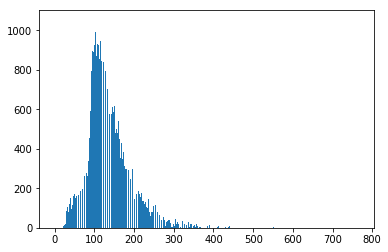

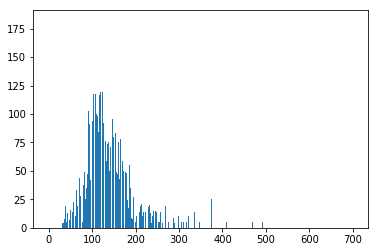

In [4]:
print "Context (Training Set)"
context_statistics(train_context)
print
print "Context (Dev Set)"
context_statistics(dev_context)

Question (Training Set)
Number of examples: 86318
Max Length: 60
Mode Length: 10
>=30: 86 (0.0996315948006%)
>=25: 440 (0.509743043166%)
>=20: 2626 (3.04223916217%)

Question (Dev Set)
Number of examples: 10391
Max Length: 34
Mode Length: 11
>=30: 9 (0.0866134154557%)
>=25: 50 (0.48118564142%)
>=20: 334 (3.21432008469%)


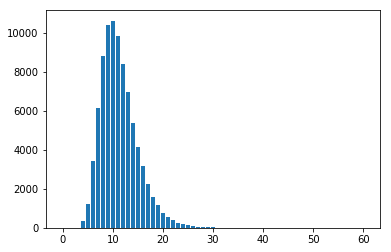

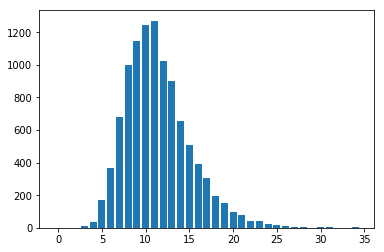

In [5]:
print "Question (Training Set)"
question_statistics(train_question)
print
print "Question (Dev Set)"
question_statistics(dev_question)

Span (Training Set)
Number of examples: 86318
Max Span: 46
Mode Span: 1
>=20: 1054 (1.22106628977%)
>=15: 2425 (2.80937927199%)
>=10: 5452 (6.31617970759%)
None

Span (Dev Set)
Number of examples: 10391
Max Span: 37
Mode Span: 1
>=20: 73 (0.702531036474%)
>=15: 188 (1.80925801174%)
>=10: 525 (5.05244923491%)
None


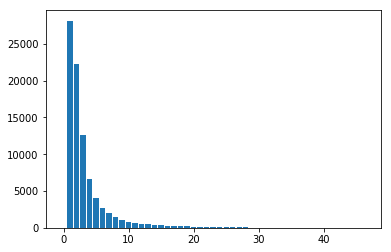

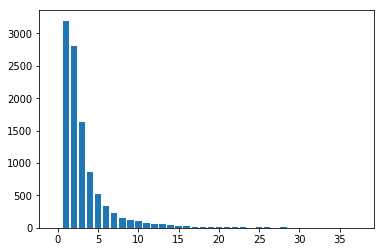

In [6]:
print "Span (Training Set)"
print span_statistics(train_span)
print
print "Span (Dev Set)"
print span_statistics(dev_span)

In [7]:
# How many answers have no English words (i.e. only numbers and punctuations)?
def answer_no_word(data):
    num_examples = 0
    num_no_word = 0
    with open(data, 'r') as F:
        for line in F:
            num_examples += 1
            num_no_word += 1
            answer = line.strip()
            for c in answer:
                if c.isalpha():
                    num_no_word -= 1
                    break
    percent = 100.0 * num_no_word / num_examples
    print "{} Examples, {} of which have no alphabetical characters ({}%)".format(num_examples, num_no_word, percent)

print "Training Set:"
answer_no_word(train_answer)
print "Dev Set:"
answer_no_word(dev_answer)

Training Set:
86318 Examples, 9186 of which have no alphabetical characters (10.642044533%)
Dev Set:
10391 Examples, 979 of which have no alphabetical characters (9.42161485901%)


In [17]:
# Starting word of the questions
def question_start(data):
    # counter = {'who': 0, 'what': 0, 'when': 0, 'where': 0, 'which': 0, 'why': 'how': 0}
    counter = {}
    num_examples = 0
    with open(data, 'r') as F:
        for line in F:
            num_examples += 1
            word = line.strip().split(' ')[0]
            counter[word] = counter.get(word, 0) + 1
    top_values = sorted(counter.values(), reverse=True)[:10]
    top_list = [(key, val) for key, val in counter.iteritems() if val in top_values]
    top_list.sort(key=lambda x: x[1], reverse=True)
    print "Total: {}".format(num_examples)
    for key, val in top_list:
        print "{}: {} ({}%)".format(key, val, 100.0 * val / num_examples)

print "Training Set Top Question Types---"
question_start(train_question)
print
print "Dev Set Top Question Types---"
question_start(dev_question)

Training Set Top Question Types---
Total: 86318
what: 37334 (43.2516972126%)
who: 8135 (9.42445376399%)
how: 7903 (9.15568015941%)
when: 5355 (6.20380453671%)
in: 4283 (4.96188512245%)
which: 4125 (4.77884102968%)
where: 3254 (3.7697815056%)
the: 2283 (2.64487128988%)
why: 1183 (1.37051368197%)
on: 587 (0.68004355986%)

Dev Set Top Question Types---
Total: 10391
what: 4704 (45.2699451448%)
who: 1057 (10.1722644596%)
how: 1045 (10.0567799057%)
when: 676 (6.505629872%)
which: 451 (4.34029448561%)
in: 436 (4.19593879319%)
where: 431 (4.14782022904%)
the: 233 (2.24232508902%)
why: 150 (1.44355692426%)
to: 42 (0.404195938793%)
on: 42 (0.404195938793%)
